In [1]:
# also look at: https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
# Importing Libraries
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# First define our overall gradient descent function

In [2]:
def gradient(func_to_min, deriv_func_to_min, gradient_descent, learning_rate = 0.01, initial_guess = 0, num_iterations = 100, threshold = 0.001):
    
    # Hyperparams from function inputs
    learning_rate = learning_rate
    initial_guess = initial_guess
    num_iterations = num_iterations
    threshold = threshold
    
    # the following three are outside functions so that they can be changed as we want
    def call_function_to_minimize(x):
        return func_to_min(x)

    def call_derivative_of_function(x):
        return deriv_func_to_min(x)
    
    def call_gradient_descent(deriv_func_to_min, learning_rate, initial_guess, num_iterations, threshold):
        return gradient_descent(deriv_func_to_min, learning_rate, initial_guess, num_iterations, threshold)

    # Run gradient descent
    minimum, total_iterations = call_gradient_descent(call_derivative_of_function, learning_rate, initial_guess,\
                                                      num_iterations, threshold)

    # print("Minimum value found at x =", minimum)
    # print("Minimum function value =", function_to_minimize(minimum))
    # print(total_iterations)
    
    return total_iterations, minimum, call_function_to_minimize(minimum)

# Use the gradient function and first use constant descent function

In [3]:
# Define the function to minimize
def function_to_minimize(x):
    return x**2 + 5*x + 6

# Define the derivative of the function
def derivative_of_function(x):
    return 2*x + 5

# Gradient Descent function
def constant_descent(deriv_func_to_min, learning_rate, initial_guess, num_iterations, threshold):
    
    x = initial_guess
    
    for iteration in range(num_iterations):
        prev_guess = x
        gradient = deriv_func_to_min(x)
        x = x - learning_rate * gradient

        if iteration > 0 and abs(x - prev_guess) <= threshold:
            break
        else:
            pass

    return x, iteration + 1

In [4]:
runs = 50

learning_rate = np.random.uniform(0, 0.005, (runs, ))
initial_guesses = np.random.uniform(-20, 20, (runs, ))
iterations_list = []

max_iterations = 10_000
max_threshold = 0.0001

for guess in initial_guesses:
    temp_list = []

    for rate in learning_rate:
        temp_list.append(gradient(function_to_minimize, derivative_of_function, constant_descent, learning_rate = rate,\
                                  initial_guess = guess, num_iterations = max_iterations, threshold = max_threshold)[0])
    
    # this will create a list of lists as z-values so we can graph
    iterations_list.append(temp_list)

In [5]:
# save variables for our constant learning rate section
const_learning_rate = learning_rate
const_initial_guesses = initial_guesses
const_iterations_list = iterations_list

# each median is for initial_guesses
const_medians = [np.median(iters) for iters in const_iterations_list]

const_total_median = np.median(const_medians)
const_total_median

1305.5

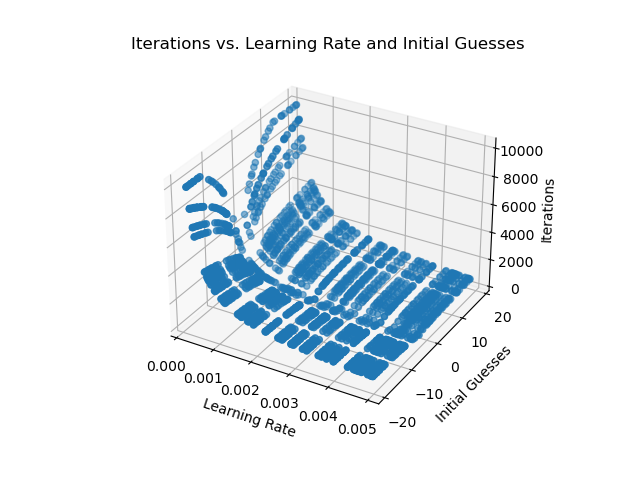

In [6]:
# make the graph interactive
%matplotlib widget 

X = np.array(learning_rate)
Y = np.array(initial_guesses)

x, y = np.meshgrid(X, Y)
z = np.array(iterations_list)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x, y, z, cmap=cm.coolwarm,)
ax.scatter(x, y, z)

# Add a title to the plot
plt.title('Iterations vs. Learning Rate and Initial Guesses')

# Adding labels
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Initial Guesses')
ax.set_zlabel('Iterations')

plt.show()

# Create a descent function with random learning rates now

In [7]:
# Define the function to minimize
def function_to_minimize(x):
    return x**2 + 5*x + 6

# Define the derivative of the function
def derivative_of_function(x):
    return 2*x + 5

# Gradient Descent function
def random_descent(deriv_func_to_min, learning_rate, initial_guess, num_iterations, threshold):
    
    #np.random.seed(8567) # include for reproduction of results
    
    x = initial_guess
    
    for iteration in range(num_iterations):
        prev_guess = x
        gradient = deriv_func_to_min(x)
        
        # this is where the randomness is being included - we need to make sure that we get a positive number here so clip any negative values
        rnd_learning_rate = np.random.normal(learning_rate, learning_rate/2)
        while rnd_learning_rate <= 0:
            rnd_learning_rate = np.random.normal(learning_rate, learning_rate/2)
        
        x = x - rnd_learning_rate * gradient

        if iteration > 0 and abs(x - prev_guess) <= threshold:
            break
        else:
            pass

    return x, iteration + 1

In [8]:
runs = 50

learning_rate = np.random.uniform(0, 0.005, (runs, )) # learning rate is random but will use these as a baseline
initial_guesses = np.random.uniform(-20, 20, (runs, ))
iterations_list = []

max_iterations = 10_000
max_threshold = 0.0001

for guess in initial_guesses:
    temp_list = []

    for rate in learning_rate:
        temp_list.append(gradient(function_to_minimize, derivative_of_function, random_descent, learning_rate = rate,\
                                  initial_guess = guess, num_iterations = max_iterations, threshold = max_threshold)[0])
    
    # this will create a list of lists as z-values so we can graph
    iterations_list.append(temp_list)

In [9]:
# save variables for our random learning rate section
rnd_learning_rate = learning_rate
rnd_initial_guesses = initial_guesses
rnd_iterations_list = iterations_list

# each median is for initial_guesses
rnd_medians = [np.median(iters) for iters in rnd_iterations_list]

rnd_total_median = np.median(rnd_medians)
rnd_total_median

490.75

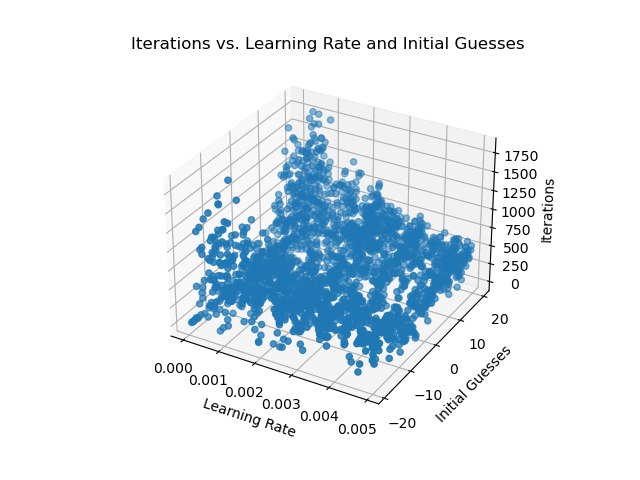

In [10]:
# make the graph interactive
%matplotlib widget 

X = np.array(learning_rate)
Y = np.array(initial_guesses)

x, y = np.meshgrid(X, Y)
z = np.array(iterations_list)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x, y, z, cmap=cm.coolwarm,)
ax.scatter(x, y, z)

# Add a title to the plot
plt.title('Iterations vs. Learning Rate and Initial Guesses')

# Adding labels
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Initial Guesses')
ax.set_zlabel('Iterations')

plt.show()

# Look at comparisons between the two on 2D plot

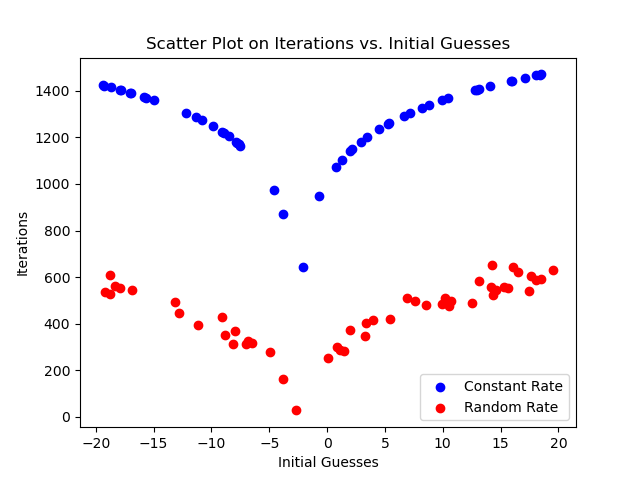

In [14]:
# data of constant learning rate
x1 = const_initial_guesses
y1 = const_medians

# data of random initial guesses
x2 = rnd_initial_guesses
y2 = rnd_medians

# Create figure and axis
fig, ax = plt.subplots()

# Create scatter plots
ax.scatter(x1, y1, color='blue', label='Constant Rate')
ax.scatter(x2, y2, color='red', label='Random Rate')

# Add labels and title
ax.set_xlabel('Initial Guesses')
ax.set_ylabel('Iterations')
ax.set_title('Scatter Plot on Iterations vs. Initial Guesses')

# Add legend
ax.legend(loc='lower right')

# Show plot
plt.show()

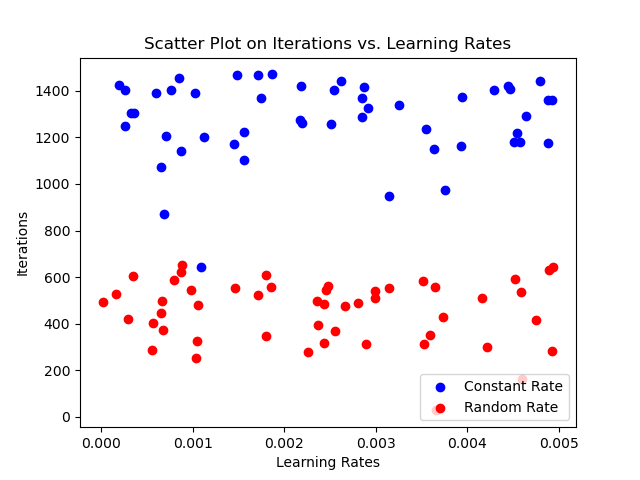

In [15]:
# data of constant learning rate
x1 = const_learning_rate
y1 = const_medians

# data of random learning rate
x2 = rnd_learning_rate
y2 = rnd_medians

# Create figure and axis
fig, ax = plt.subplots()

# Create scatter plots
ax.scatter(x1, y1, color='blue', label='Constant Rate')
ax.scatter(x2, y2, color='red', label='Random Rate')

# Add labels and title
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Iterations')
ax.set_title('Scatter Plot on Iterations vs. Learning Rates')

# Add legend
ax.legend(loc='lower right')

# Show plot
plt.show()

# Comparisons on a 3D plot

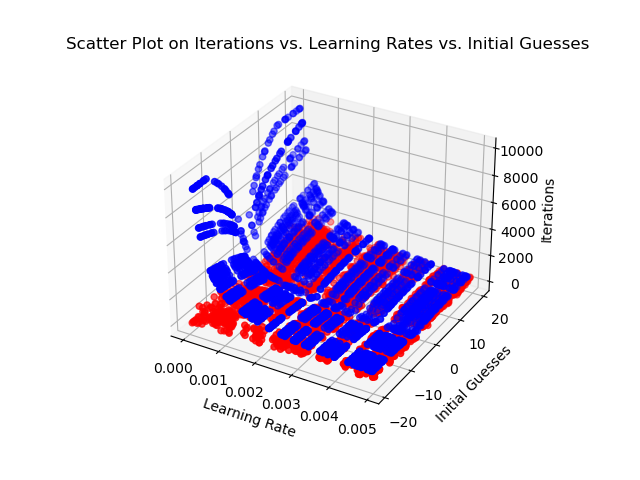

In [16]:
# make the graph interactive
%matplotlib widget 

# constant learning rates
X1 = np.array(const_learning_rate)
Y1 = np.array(const_initial_guesses)

x1, y1 = np.meshgrid(X1, Y1)
z1 = np.array(const_iterations_list)

# random learning rates
X2 = np.array(rnd_learning_rate)
Y2 = np.array(rnd_initial_guesses)

x2, y2 = np.meshgrid(X2, Y2)
z2 = np.array(rnd_iterations_list)

# create figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, color='blue', label='Constant Rate')
ax.scatter(x2, y2, z2, color='red', label='Random Rate')

# Add a title to the plot
plt.title('Scatter Plot on Iterations vs. Learning Rates vs. Initial Guesses')

# Adding labels
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Initial Guesses')
ax.set_zlabel('Iterations')

plt.show()